# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Compuer vision is the practice of writing algorithmns that can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset(101 differrent classes of food):https://www.kaggle.com/dansbecker/food-101

However we have modified it to only use two classes (pizza and steak) using the image data modification notebook.

> **Note:** we start with a smaller dataset so we can experiment quickly and figure out what works (or better what doesn't work) before scaling up.


In [ ]:
#uncomment to download again
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# #unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project this means visualizing many samples of your data as possible.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [ ]:
import os

# walk throught the pizza_steak directory and list number of files

for dirpath,dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
# Another way to findout howmany images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize images, first let's get class names programatically.

In [ ]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# create a list of class_names from the subdirectories folder
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    #get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    print(f"Image shape : {img.shape}") # show the shape of the image
    return img

Image shape : (384, 512, 3)


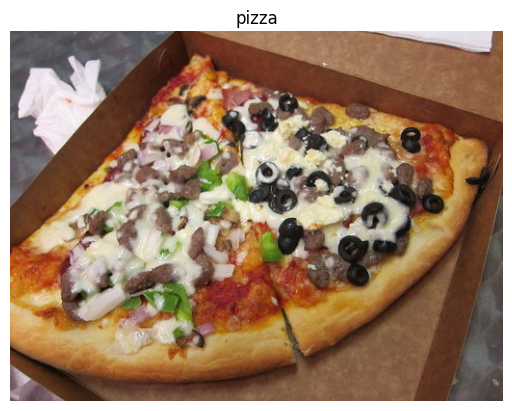

In [ ]:
# view a random image from the train data
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

2024-04-03 09:50:37.086993: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-03 09:50:37.087017: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-03 09:50:37.087022: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-03 09:50:37.087042: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-03 09:50:37.087055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 85,  86,  88],
        [ 84,  85,  87],
        [ 82,  83,  85],
        ...,
        [137,  90,  64],
        [139,  92,  62],
        [140,  94,  61]],

       [[ 86,  87,  89],
        [ 85,  86,  88],
        [ 83,  84,  86],
        ...,
        [140,  90,  65],
        [138,  91,  61],
        [136,  90,  57]],

       [[ 87,  88,  90],
        [ 87,  88,  90],
        [ 86,  87,  89],
        ...,
        [142,  92,  67],
        [137,  91,  58],
        [134,  88,  54]],

       ...,

       [[102,  81,  90],
        [111,  90,  99],
        [125, 102, 112],
        ...,
        [ 81,  67,  64],
        [ 79,  65,  62],
        [ 76,  62,  59]],

       [[ 96,  81,  88],
        [ 98,  83,  90],
        [103,  86,  94],
        ...,
        [ 79,  65,  62],
        [ 78,  64,  61],
        [ 74,  60,  57]],

       [[111, 100, 106],
        [107,  96, 102],
        [101,  88,  95],
        ...,
        [ 76,  62,  5

In [ ]:
# View the image shape
img.shape # returns width, height and color channel

(384, 512, 3)

**NOTE:** As we have discussed before, many machine learning models, including neural networks prefer values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize), their pixel values by dividing the images array by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.33333333, 0.3372549 , 0.34509804],
        [0.32941176, 0.33333333, 0.34117647],
        [0.32156863, 0.3254902 , 0.33333333],
        ...,
        [0.5372549 , 0.35294118, 0.25098039],
        [0.54509804, 0.36078431, 0.24313725],
        [0.54901961, 0.36862745, 0.23921569]],

       [[0.3372549 , 0.34117647, 0.34901961],
        [0.33333333, 0.3372549 , 0.34509804],
        [0.3254902 , 0.32941176, 0.3372549 ],
        ...,
        [0.54901961, 0.35294118, 0.25490196],
        [0.54117647, 0.35686275, 0.23921569],
        [0.53333333, 0.35294118, 0.22352941]],

       [[0.34117647, 0.34509804, 0.35294118],
        [0.34117647, 0.34509804, 0.35294118],
        [0.3372549 , 0.34117647, 0.34901961],
        ...,
        [0.55686275, 0.36078431, 0.2627451 ],
        [0.5372549 , 0.35686275, 0.22745098],
        [0.5254902 , 0.34509804, 0.21176471]],

       ...,

       [[0.4       , 0.31764706, 0.35294118],
        [0.43529412, 0.35294118, 0.38823529],
        [0.49019608, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images.
* Preprocess our images.
* Build a CNN to find patterns in our images.
* Compile our CNN
* Fit the CNN to our training data.

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)

# Preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

#setup paths to our directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),

    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#not working
# model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
#             validation_data = valid_data,
#             validation_steps=len(valid_data))

model_1.fit(train_data, validation_data=valid_data, epochs=5)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2024-04-03 09:50:37.946091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.5574 - loss: 0.6672 - val_accuracy: 0.8240 - val_loss: 0.3856
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.8164 - loss: 0.4320 - val_accuracy: 0.8520 - val_loss: 0.3744
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.8204 - loss: 0.3963 - val_accuracy: 0.8620 - val_loss: 0.3368
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.8608 - loss: 0.3449 - val_accuracy: 0.8800 - val_loss: 0.3122
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.8649 - loss: 0.3519 - val_accuracy: 0.8640 - val_loss: 0.3122


In [ ]:
#get model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

**NOTE:** Go through the CNN explainer website- https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we build on the previous section to see if it works on our large data.  The model we build was from the tensorflow.playground.org.

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model to replicate the tensorflow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5138 - loss: 1.8535 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.4808 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5115 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5121 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
# trying on an improved model
tf.random.set_seed(42)

#creating model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(48, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting the model
model_3.fit(train_data,epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5909 - loss: 4.2469 - val_accuracy: 0.7320 - val_loss: 0.6754
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7172 - loss: 0.7373 - val_accuracy: 0.7240 - val_loss: 0.7823
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.7036 - loss: 0.8175 - val_accuracy: 0.7160 - val_loss: 0.9332
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7452 - loss: 0.8360 - val_accuracy: 0.7020 - val_loss: 1.1563
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7315 - loss: 1.0329 - val_accuracy: 0.7960 - val_loss: 0.4303


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parametrs than our CNN model, model_2 performs terribly.. let's try a larger model.

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

#fit the model
history_4 = model_4.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.5805 - loss: 3.0921 - val_accuracy: 0.7800 - val_loss: 0.4737
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.6966 - loss: 0.9416 - val_accuracy: 0.6400 - val_loss: 1.9343
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.6938 - loss: 1.1009 - val_accuracy: 0.7400 - val_loss: 0.5012
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.7245 - loss: 0.6015 - val_accuracy: 0.7600 - val_loss: 0.5085
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.7507 - loss: 0.5766 - val_accuracy: 0.7540 - val_loss: 0.5118


In [ ]:
# get a summary of model_4
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**NOTE:** You can think of trainable parameters as *patterns a model can learn from data**. Intuitively you might think more is better. And in lot's of cases it is. But in this case, the different styles of models we are using. Where a series of Dense layers has a number of different learnable parameters connected to each other and hence higher number of possible learnable patterns. **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less trainable parameters in out convolutional neural network, these are often more helful in deciphering between differerent **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data(visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normlizing & turning our data into batches)
3. Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust differrent parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment, experiment, experiment)

### 1. Become one with the data

Image shape : (512, 288, 3)
Image shape : (512, 512, 3)


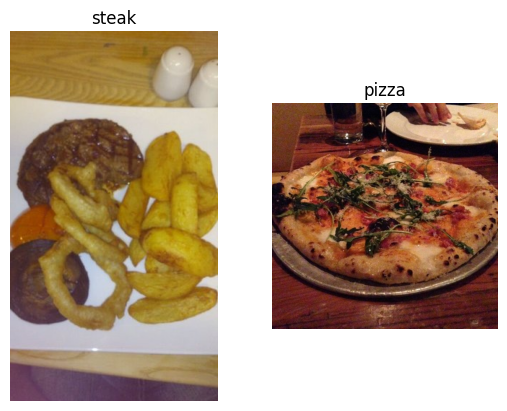

In [ ]:
# visualize the data
plt.figure()
plt.subplot(1,2,1)

steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")


### 2. Preprocessing(prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into *batches*

A batch is a small subset of data. Rather than looking all ~10000 images at one times, a model might look at 32 images at a time.

It does this for a couple  of reasons.
1. 10,000 (or more) might not fit into memory of your processor(GPU).

2. Trying to learn patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Batch sizes which are more than that increases the test error.



In [ ]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)


In [ ]:
# Load the image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,# target directory of images
                                             target_size=(224,224), #target size of the image(width,height)
                                             class_mode="binary", #type of data you are working with
                                             batch_size=32) # size of mini batches to load data into

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of training data batch

images, labels = train_data[0] # get the first batches of images/labels in the train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.03137255, 0.01568628, 0.00392157],
          [0.03529412, 0.01960784, 0.00784314],
          [0.03529412, 0.01960784, 0.00784314],
          ...,
          [0.01568628, 0.01176471, 0.00392157],
          [0.01568628, 0.01176471, 0.00392157],
          [0.01568628, 0.01176471, 0.00392157]],
 
         [[0.02352941, 0.00784314, 0.        ],
          [0.02745098, 0.01176471, 0.        ],
          [0.02745098, 0.01176471, 0.        ],
          ...,
          [0.01568628, 0.01176471, 0.00392157],
          [0.01960784, 0.01568628, 0.00784314],
          [0.01960784, 0.01568628, 0.00784314]],
 
         [[0.02745098, 0.01176471, 0.        ],
          [0.03137255, 0.01568628, 0.00392157],
          [0.03137255, 0.01568628, 0.00392157],
          ...,
          [0.01960784, 0.01568628, 0.00784314],
          [0.01960784, 0.01568628, 0.00784314],
          [0.01960784, 0.01568628, 0.00784314]],
 
         ...,
 
         [[0.2392157 , 0.09803922, 0.01176471],
          [0.23921

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# view the first batch labels
labels

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experimenting, you try to beat the baseline.

> **NOTE:** In deeplearning, there is almost infininte amount of architecture you could create. So one of the best ways to get startes is to start with something simple and see if it works on your data and then introduce complexity as required(e.g look at which current model is performing best in the field for your problem).

> You can checkout https://www.paperswithcode.com to find latest architectures in machine learning.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model(this will be our baseline model, a simple layer convolutional neural network)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),#input layer specify input shape
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #outpur layer(working with binary classification so only 1 neuron)
])


* Filters: Decides how many filters should pass over the input tensor.(e.g: sliding window over an image). Typical values are 10, 32,64,128(higher the filters you have the complex the model becomes)
* Kernel_size: Decides the shape of the filters(also called filter size). It is the sliding window over the output. Typical values are 3,5,7. Lower values learn smaller features where as larger values learn larger features.
* Padding: Pads the target tensor with zeros(if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), thus lowering the output shape.
* Strides : The number of steps across a filter takes across as image at a time.(eg. if strides=1, a filter moves across an image 1 pixel at a time.) default value is 1. We can also specify it as 2.


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get the summary of our model
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [ ]:
# Check the lengths of the training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.6256 - loss: 1.6836 - val_accuracy: 0.7800 - val_loss: 0.5036
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.8215 - loss: 0.4450 - val_accuracy: 0.8160 - val_loss: 0.4241
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.8780 - loss: 0.3266 - val_accuracy: 0.8080 - val_loss: 0.4101
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.9422 - loss: 0.1611 - val_accuracy: 0.7740 - val_loss: 0.5511
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.9803 - loss: 0.0682 - val_accuracy: 0.7440 - val_loss: 0.6686


### 5. Evaluate our model

It looks like our model is learning something. Let's evaluate it.

<Axes: >

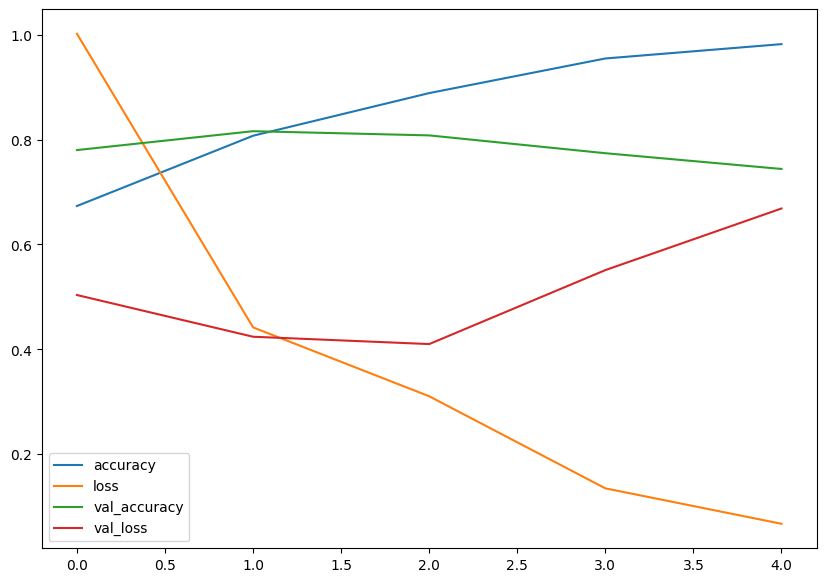

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [ ]:
# Plot validation and training curves seperately
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation metrics
    """
    loss= history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # How many epochs are there

    #Plot losss

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="Validation accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


> **NOTE:** When a model's **validation loss starts to increase**, it is likely that model is **overfitting** the training dataset. This means, it is learning the patterns in the training dataset *too well* and thus the model's ability to generalize to useen data will be diminished.

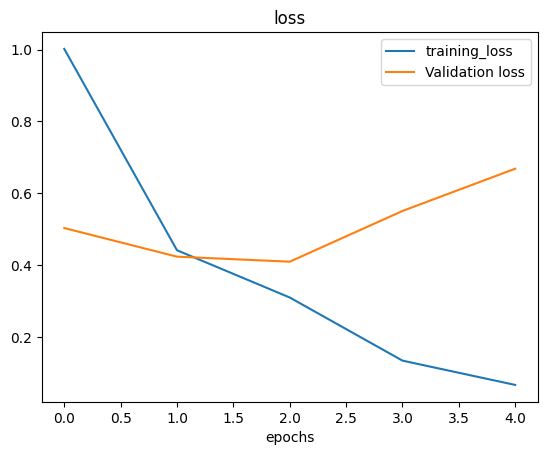

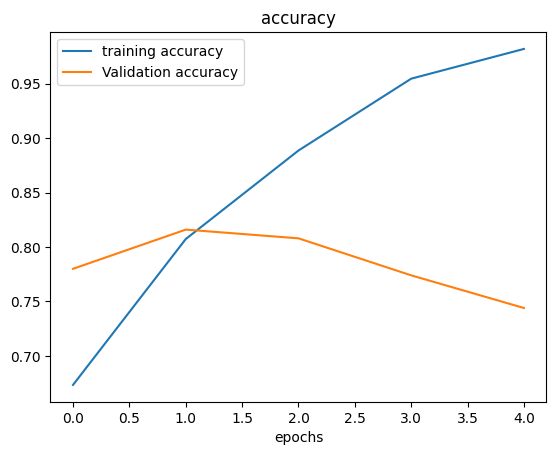

In [ ]:
# Check out loss and accuracy of model5
plot_loss_curves(history_5)

> **NOTE:** Ideally two loss curves (training and validation) will be similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of flatten layer.

Reduce overfitting:
* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data..

> **NOTE:** Reducing overfitting is also known as **regularization**.


In [ ]:
# Create a model (this is going to be our new baseline)
tf.random.set_seed(42)
model_6 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


In [ ]:
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5693 - loss: 0.6739 - val_accuracy: 0.7940 - val_loss: 0.4679
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7674 - loss: 0.4829 - val_accuracy: 0.8360 - val_loss: 0.3920
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.7983 - loss: 0.4456 - val_accuracy: 0.8160 - val_loss: 0.3997
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8188 - loss: 0.4082 - val_accuracy: 0.8720 - val_loss: 0.3517
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8590 - loss: 0.3619 - val_accuracy: 0.8800 - val_loss: 0.2989


In [ ]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

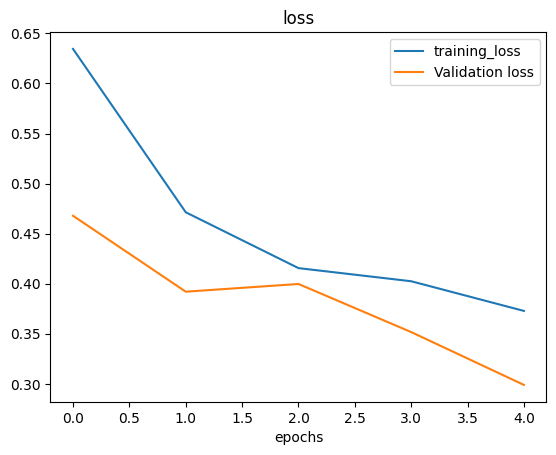

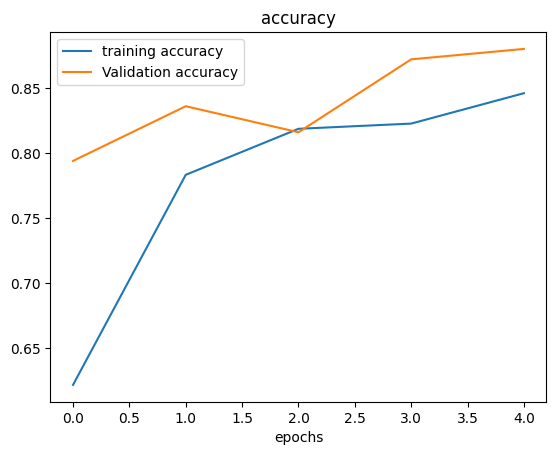

In [ ]:
# Plot loss curves
plot_loss_curves(history_6)

### Finding the Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2, #how much do you want to rotate an image?
                                             shear_range=0.2, #how much you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on the image
                                             width_shift_range=0.2, # move your image around x axis
                                             height_shift_range=0.2, #move your image around y axis
                                             horizontal_flip=True) #Flip the image randomly

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255.)

# Create ImageDataGenerator fot test dataset
test_datagen = ImageDataGenerator(rescale=1./255.)



> **Question:** what is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn to allowing our models to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of the image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [ ]:
# import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                     batch_size=32,
                                                                     class_mode="binary",
                                                                     shuffle=False) #for demonstraion only
# Create non-augmented training data batches
print('Non augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)

# Create non augmented test dataset
print('Non augmented test dataset')
test_data = test_datagen.flow_from_directory(test_dir,
                         target_size=(224,224),
                         batch_size=32,
                         class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test dataset
Found 500 images belonging to 2 classes.


> **NOTE:** Data augmentation is only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Let's visualize some augmented data


In [ ]:
# Get some sample augmented data batches
images, labels = train_data[0]

augmented_images, augmented_labels = train_data_augmented[0] #labels are not augmented


Showing image number:5


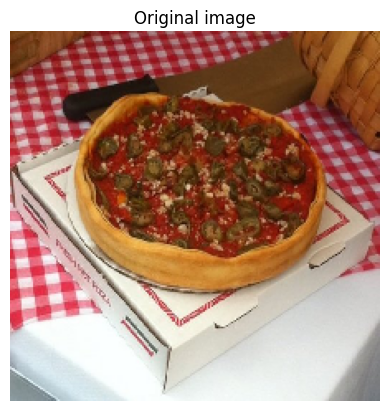

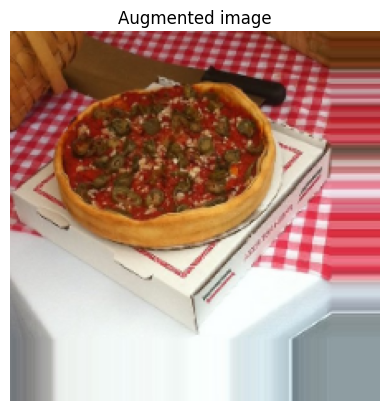

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0,31) # our batch size is 32
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);


Now we have seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model with augmented data
tf.random.set_seed(42)
model_7 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 294ms/step - accuracy: 0.4353 - loss: 0.7426 - val_accuracy: 0.5420 - val_loss: 0.6823
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.4212 - loss: 0.6958 - val_accuracy: 0.6520 - val_loss: 0.6853
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 291ms/step - accuracy: 0.6824 - loss: 0.6821 - val_accuracy: 0.5060 - val_loss: 0.7264
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.6503 - loss: 0.6778 - val_accuracy: 0.7100 - val_loss: 0.6104
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - accuracy: 0.5947 - loss: 0.6706 - val_accuracy: 0.7620 - val_loss: 0.6336


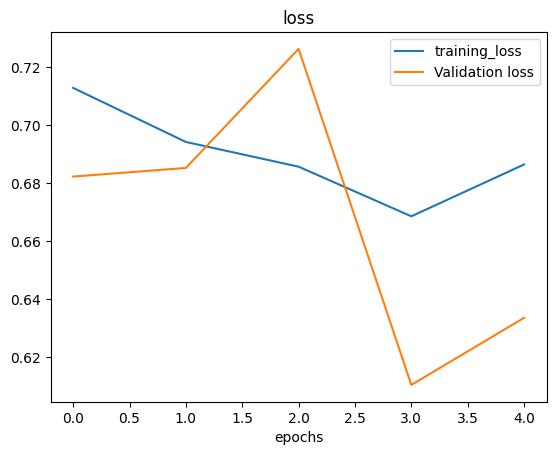

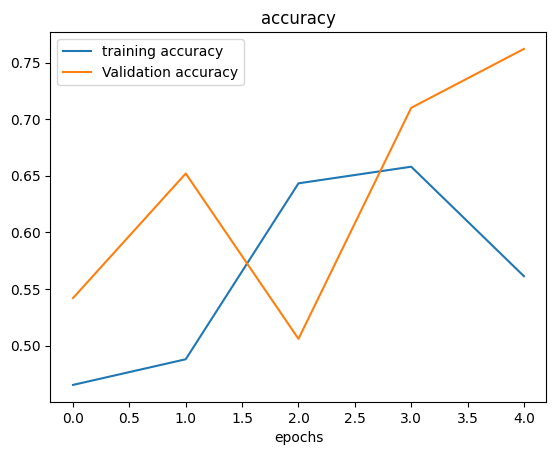

In [ ]:
plot_loss_curves(history_7)

Seems like our model is unable to recognise patterns from the data, because our data is too complex.

Lets try to shuffle our augmented train data and train another model(the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            shuffle=True,
                                                                            batch_size=32,
                                                                            class_mode="binary")

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model same as model_6 and model_7
tf.random.set_seed(42)
model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),# 2 is the default pool_size
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - accuracy: 0.5418 - loss: 0.6886 - val_accuracy: 0.7080 - val_loss: 0.5899
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.6971 - loss: 0.5832 - val_accuracy: 0.8220 - val_loss: 0.4400
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 289ms/step - accuracy: 0.7602 - loss: 0.5296 - val_accuracy: 0.8380 - val_loss: 0.4250
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - accuracy: 0.7399 - loss: 0.5289 - val_accuracy: 0.7700 - val_loss: 0.4733
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - accuracy: 0.7691 - loss: 0.4888 - val_accuracy: 0.8200 - val_loss: 0.4250


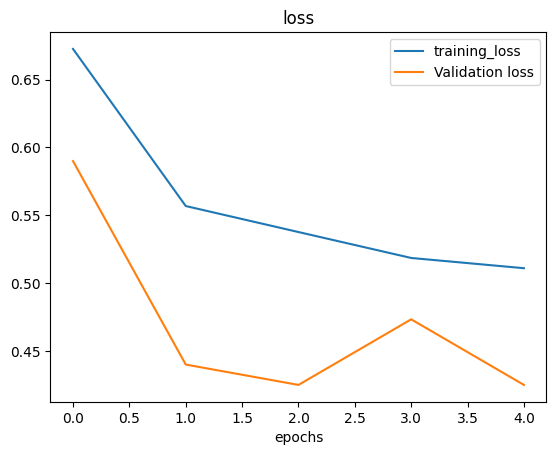

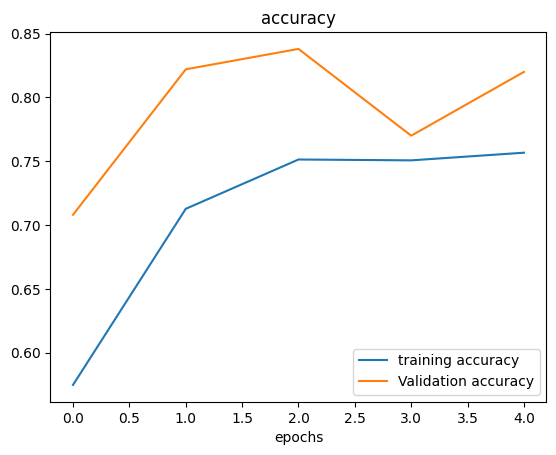

In [ ]:
plot_loss_curves(history_8)

**NOTE:** When shuffling training data, the model get's exposed to all differrent kinds of data during training, thus enabling it to learn features across a wide array of images(in our case pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we already beaten our baseline, there are a few things we could try to continue to improve the model.

* Increase the number of model layers(e.g add more Conv2D, MaxPool2D layers)
* Increase the number of filters in each convolution layer(e.g from 10 to 32 or even 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data(give model more oppurtunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Let's try and recreate the model which is in the CNN explainer website.

In [ ]:
# Creating model
tf.random.set_seed(42)
model_9 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fitting the model
history_9 = model_9.fit(train_data_augmented_shuffled, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.5868 - loss: 0.6687 - val_accuracy: 0.7380 - val_loss: 0.5290
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.7635 - loss: 0.5112 - val_accuracy: 0.7160 - val_loss: 0.5407
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - accuracy: 0.7401 - loss: 0.5213 - val_accuracy: 0.8560 - val_loss: 0.3697
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 310ms/step - accuracy: 0.7934 - loss: 0.4679 - val_accuracy: 0.8380 - val_loss: 0.3529
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.7952 - loss: 0.4568 - val_accuracy: 0.8680 - val_loss: 0.3082


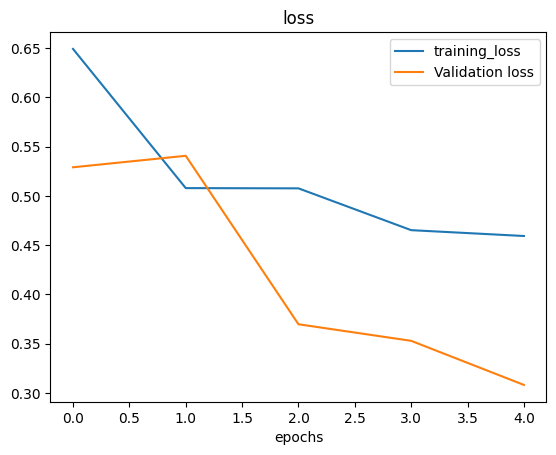

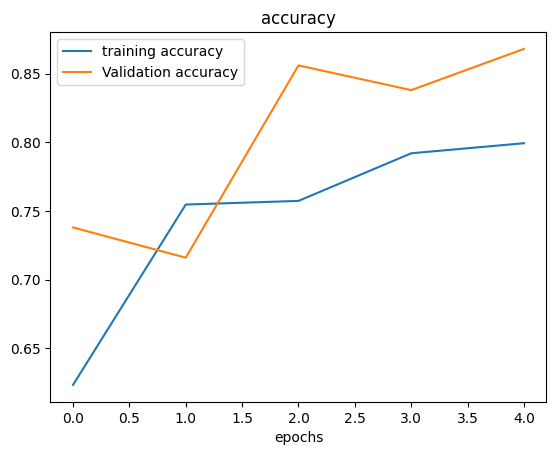

In [ ]:
# Plotting the loss curves
plot_loss_curves(history_9)

In [ ]:
# increasing the number of filters to 32
#since there is no improvement switching back to 10 filters
tf.random.set_seed(42)

#creating the model
model_10 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compiling the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

#fitting the model
history_10 = model_10.fit(train_data_augmented_shuffled, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.6182 - loss: 0.6434 - val_accuracy: 0.5880 - val_loss: 0.7016
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.7280 - loss: 0.5202 - val_accuracy: 0.8560 - val_loss: 0.3518
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.7855 - loss: 0.4726 - val_accuracy: 0.8500 - val_loss: 0.3548
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.7910 - loss: 0.4691 - val_accuracy: 0.8560 - val_loss: 0.3400
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 324ms/step - accuracy: 0.8100 - loss: 0.4292 - val_accuracy: 0.8760 - val_loss: 0.3040


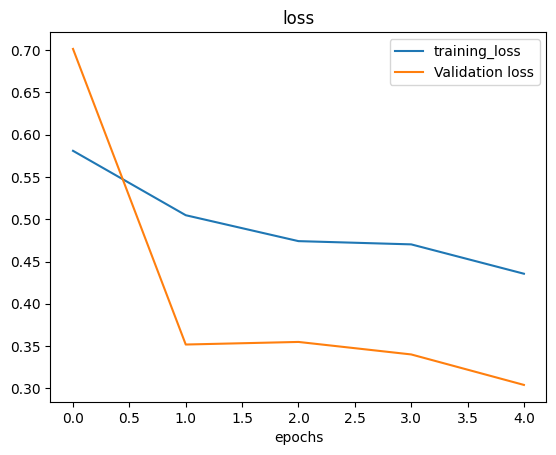

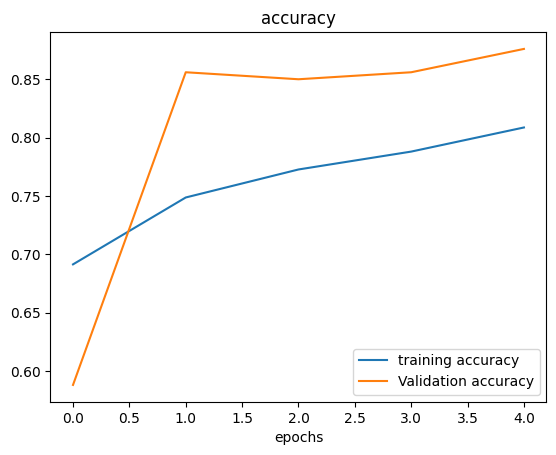

In [ ]:
plot_loss_curves(history_10)

## Making a prediction with our trained model on our own custom data

In [ ]:
# classes we are working with
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# View our example image
import matplotlib.image as mpimg
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

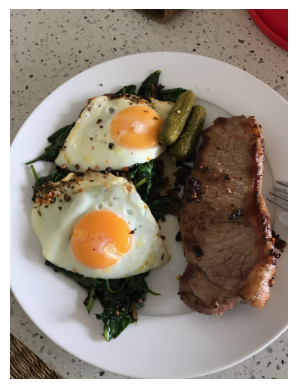

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False);

In [ ]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

> **NOTE:** When you train a neural network and you want to make a prediction with it on your own custom data, it is important that your custom data (or new data) is preprocessed into the same format as the data your model is trained on.

In [ ]:
# Create a function to import an image and resize it to be ables to be used withour model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and
    reshapes it to (img_shape, img_shape, color channel)
    """
    img = tf.io.read_file(filename)
    #Decode the read file into a tensor
    img = tf.image.decode_image(img)
    #resize the image
    img = tf.image.resize(img,[img_shape, img_shape])
    #rescale the image and get all the values between 0 and 1
    img = img/255.
    return img


In [ ]:
# Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
pred = model_10.predict(expanded_steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.9127072]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's predictions?

In [ ]:
# remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probabilites and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as title
    """
    #import the target image and process it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    #plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction :{pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


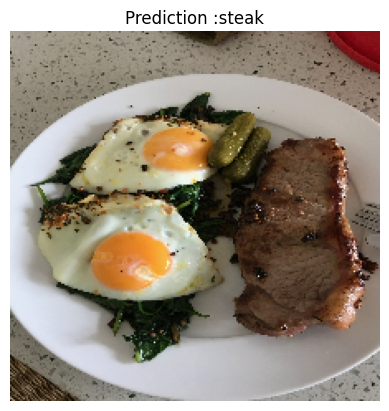

In [ ]:
pred_and_plot(model_10,"03-steak.jpeg")

Let's try with our image

In [ ]:

# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


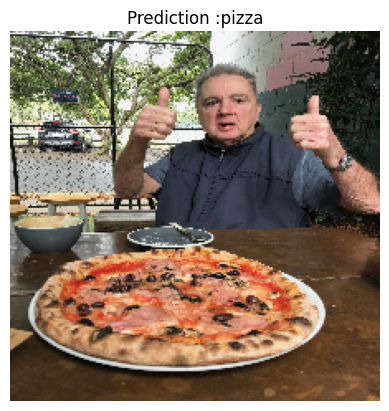

In [ ]:
pred_and_plot(model_10, "03-pizza-dad.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


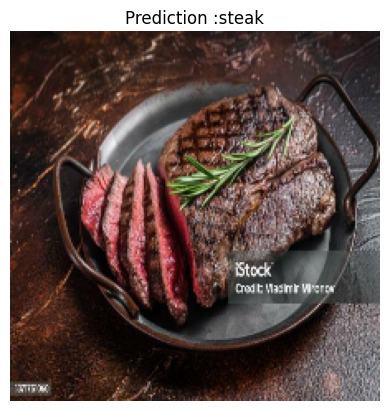

In [ ]:
pred_and_plot(model_10,"04-steak.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


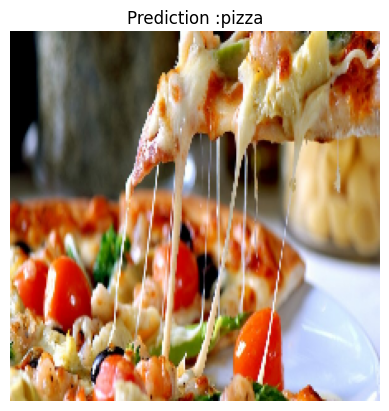

In [ ]:
pred_and_plot(model_10,"04-pizza.jpeg")

# Multi-class Image Classification

We have been through a bunch of the following steps with a binary classification problem(pizza vs steak), now we are going to step things up a notch with 10 classes of food.

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differrent hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied.

## 1. Import the data

In [1]:
# uncomment to download file again
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-05 00:59:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  52.4MB/s    in 9.0s    

2024-04-05 00:59:41 (55.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 1

In [3]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [4]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape : (384, 512, 3)


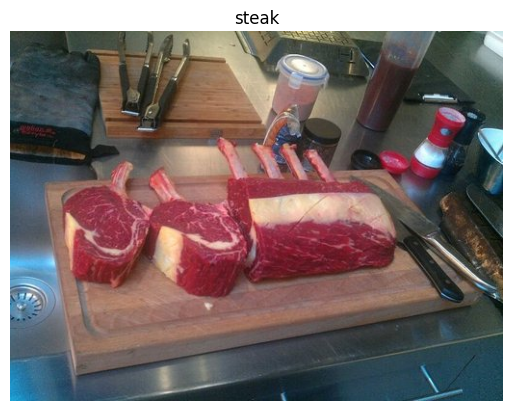

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    #get a random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    print(f"Image shape : {img.shape}") # show the shape of the image
    return img

img = view_random_image(train_dir, target_class=random.choice(class_names))

Image shape : (512, 512, 3)


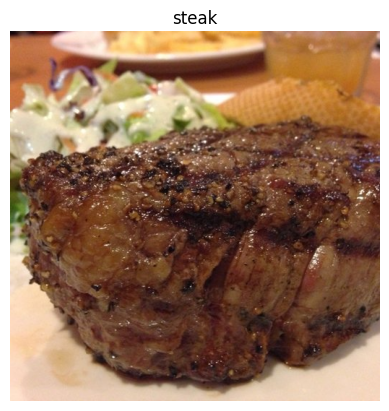

In [6]:
img2 = view_random_image(train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#creating a train data generator with data augmentation and rescaling
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1./255.,
                                                      rotation_range=0.2,
                                                      shear_range=0.2,
                                                      width_shift_range=0.2,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      height_shift_range=0.2)

# creating test data generator with rescaling
test_datagen = ImageDataGenerator(rescale=1./255.)

# create a normal train data genrator with rescalaing
train_datagen = ImageDataGenerator(rescale=1./255.)



In [8]:
# creating train dataset with shuffle and apply augmentation
train_data_augmented_shuffled = train_datagen_augmented_shuffled.flow_from_directory(train_dir,
                                                                                     target_size=(224,224),
                                                                                     batch_size=32,
                                                                                     shuffle=True,
                                                                                     class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

print("Normal train data without augmentation and shuffle")
train_data = train_datagen.flow_from_directory(train_dir,
                                               class_mode="categorical",
                                               batch_size=32,
                                               target_size=(224,224))


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Normal train data without augmentation and shuffle
Found 7500 images belonging to 10 classes.


### 3. create a model(start with a baseline)

We have been talking a lot about cnn explainer website. How about we just take their model(also has 10 classes) use it for our problem.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

#setting random seed
tf.random.set_seed(42)
#creating the baseline model
model_1= Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



### 4. Fit a model

In [10]:
#fitting the model
history_1 = model_1.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 36s 129ms/step - loss: 2.1966 - accuracy: 0.2024 - val_loss: 2.0061 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.9088 - accuracy: 0.3356 - val_loss: 1.8486 - val_accuracy: 0.3632
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.6426 - accuracy: 0.4452 - val_loss: 1.8083 - val_accuracy: 0.3752
Epoch 4/5
235/235 [==============================] - 28s 118ms/step - loss: 1.2282 - accuracy: 0.5929 - val_loss: 1.9678 - val_accuracy: 0.3708
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.6814 - accuracy: 0.7833 - val_loss: 2.4962 - val_accuracy: 0.3280


### 5. Evaluate the model

In [11]:
# Evalute on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 2.4962 - accuracy: 0.3280


[2.4961578845977783, 0.328000009059906]

In [12]:
# check out the model's loss curve on the 10 classes
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    """
    Takes the model history as argument and plot's the training
    and validation loss and accuracies
    """
    val_accuracy = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    training_loss = history.history["loss"]
    training_accuracy = history.history["accuracy"]
    epochs= range(len(history.history["loss"]))
    plt.plot(epochs, training_loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss Curve")
    plt.legend()

    plt.figure()
    plt.plot(epochs, training_accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("Accuracy curves")
    plt.legend()
    plt.show()


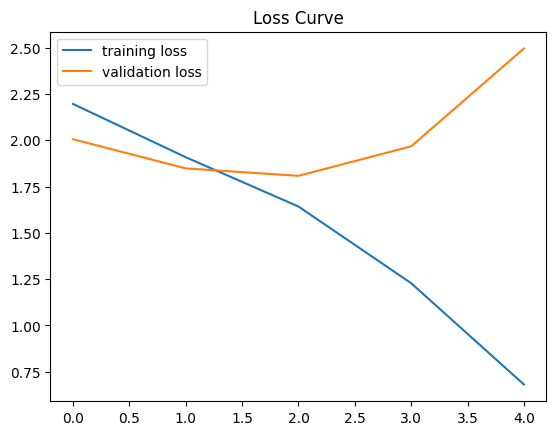

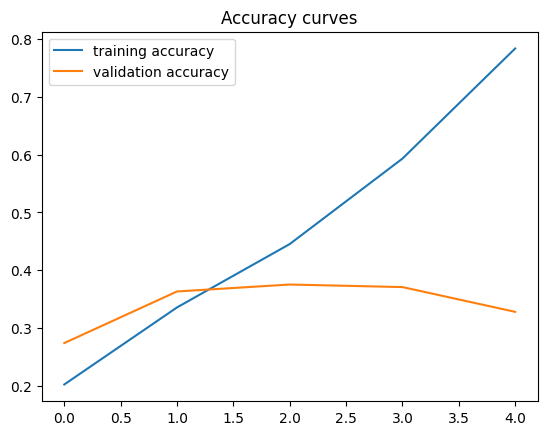

In [13]:
plot_loss_curves(history_1)

What do these loss curves tell us?

It seems our model is **overfitting** the training set quite badly. in other words, it is getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data set.



### 6. Adjust the model hyperparameters(to beat baseline/ reduce overfitting)

Due to it's perfomance on the training data, it is clear our model is learning something.

However it is not generalizing well to unseen data(overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more oppurtunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reuce number of layers or reduce the number of hidden units in layers.
* **Use data augmentation** - data augmentation manpulates training data in such a way to add more diversity to it (without altering the original data)
*  **Transfer Learning** - Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.
  


In [14]:
 # creating a simpler model
tf.random.set_seed(42)
#let's try to remove two convolutional layers
model_2 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fitting the model
history_2 = model_2.fit(train_data, epochs=5, validation_data=test_data)


Epoch 1/5
235/235 [==============================] - 31s 122ms/step - loss: 2.1020 - accuracy: 0.2401 - val_loss: 1.9791 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 27s 116ms/step - loss: 1.7433 - accuracy: 0.4076 - val_loss: 1.9020 - val_accuracy: 0.3420
Epoch 3/5
235/235 [==============================] - 27s 113ms/step - loss: 1.2904 - accuracy: 0.5912 - val_loss: 2.0274 - val_accuracy: 0.3200
Epoch 4/5
235/235 [==============================] - 27s 116ms/step - loss: 0.7483 - accuracy: 0.7805 - val_loss: 2.4162 - val_accuracy: 0.2916
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.3430 - accuracy: 0.9105 - val_loss: 2.8249 - val_accuracy: 0.3092


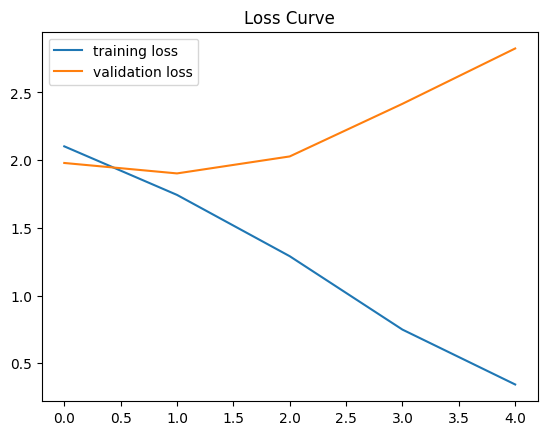

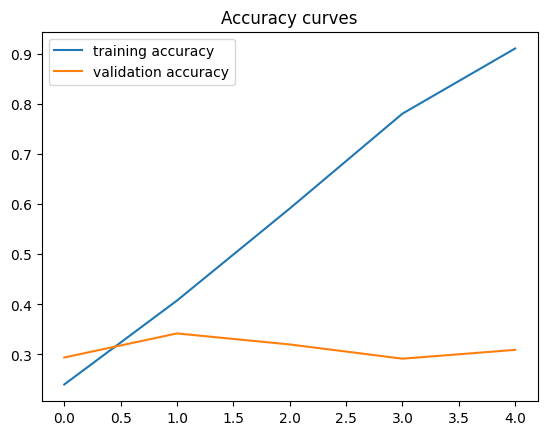

In [15]:
# checking out the loss curves of the simpler model
plot_loss_curves(history_2)

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Look's like our simplifying model didn't work. The accuracy went down and overfitting continued.

How about we try data augmentation.

### Trying to reduce overfitting with augmented data

Let's try and improve our models results by using augmentedd training data.

* Reduce Overfitting (get the train and validation loss curves closer)
* Improve validation accuracy.

In [18]:
# creating an augmented dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             shear_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="categorical",
                                                                   batch_size=32)


Found 7500 images belonging to 10 classes.


In [19]:
#fitting the augmented trained data on a model similar
# to the baseline model
tf.random.set_seed(42)

#creating model
model_3 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fitting the model
history_3 = model_3.fit(train_data_augmented, epochs=5, validation_data=test_data)


Epoch 1/5
235/235 [==============================] - 106s 445ms/step - loss: 2.2793 - accuracy: 0.1388 - val_loss: 2.2178 - val_accuracy: 0.1776
Epoch 2/5
235/235 [==============================] - 106s 452ms/step - loss: 2.1940 - accuracy: 0.1913 - val_loss: 2.0286 - val_accuracy: 0.2784
Epoch 3/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0875 - accuracy: 0.2611 - val_loss: 1.9564 - val_accuracy: 0.3212
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0068 - accuracy: 0.3029 - val_loss: 1.9111 - val_accuracy: 0.3432
Epoch 5/5
235/235 [==============================] - 108s 460ms/step - loss: 1.9717 - accuracy: 0.3133 - val_loss: 1.7834 - val_accuracy: 0.4044


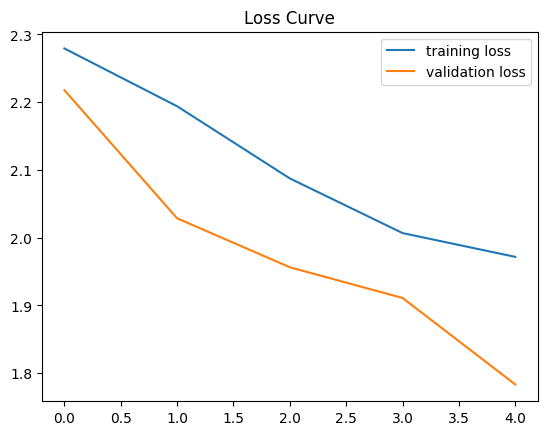

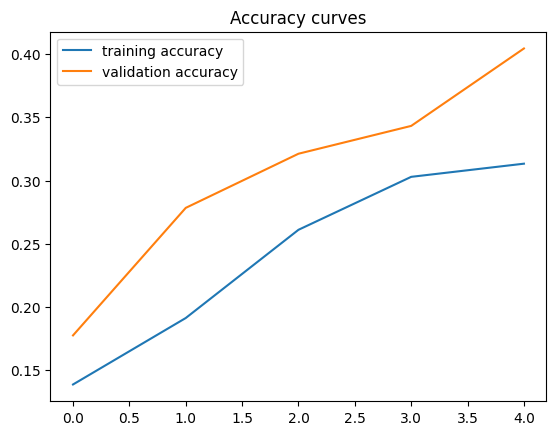

In [20]:
#plotting the loss curves
plot_loss_curves(history_3)

 **NOTE:** we can clone the model using `tf.keras.models.clone_model(model_instance)`. this clones the architecture of the model but doesnot clone the weights of the original model(it resets the internally learned patterns). we still need to compile the model and fit the model.

In [21]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.7834 - accuracy: 0.4044


[1.7834237813949585, 0.4043999910354614]

In [22]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 2.4962 - accuracy: 0.3280


[2.496157646179199, 0.328000009059906]

The loss curves are much closer to each other than the baseline model. and they look like they are in the right direction (certainly not the wrong direction). so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We can continue to bring our loss curves together and try to improve the validation/test accuracy.

We can do this by running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers/hidden units)
- Adjusting the learnig rate
- Try differrent methods of augmentation(adjust the hyper parameters of our ImageGenerator instance)
- Training for longer (increase the number of epochs)
- Try transfer learning
  

In [23]:
# trying to fit for longer

#create a clone of model 3
model_4 = tf.keras.models.clone_model(model_3)

#compiling the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fitting the model
history_4 = model_4.fit(train_data_augmented, epochs=10, validation_data=test_data)


Epoch 1/10
235/235 [==============================] - 109s 453ms/step - loss: 2.1842 - accuracy: 0.1975 - val_loss: 2.0598 - val_accuracy: 0.2640
Epoch 2/10
235/235 [==============================] - 108s 458ms/step - loss: 2.0406 - accuracy: 0.2863 - val_loss: 1.9255 - val_accuracy: 0.3360
Epoch 3/10
235/235 [==============================] - 106s 452ms/step - loss: 1.9761 - accuracy: 0.3029 - val_loss: 1.8097 - val_accuracy: 0.3688
Epoch 4/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9371 - accuracy: 0.3255 - val_loss: 1.8046 - val_accuracy: 0.3872
Epoch 5/10
235/235 [==============================] - 105s 446ms/step - loss: 1.8969 - accuracy: 0.3424 - val_loss: 1.8520 - val_accuracy: 0.3728
Epoch 6/10
235/235 [==============================] - 108s 461ms/step - loss: 1.8806 - accuracy: 0.3476 - val_loss: 1.7222 - val_accuracy: 0.4216
Epoch 7/10
235/235 [==============================] - 108s 458ms/step - loss: 1.8589 - accuracy: 0.3589 - val_loss: 1.8593 -

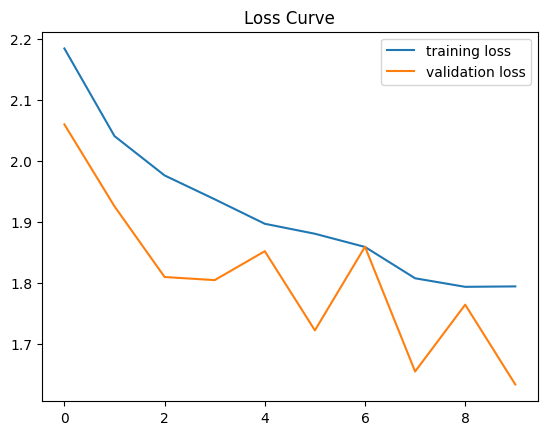

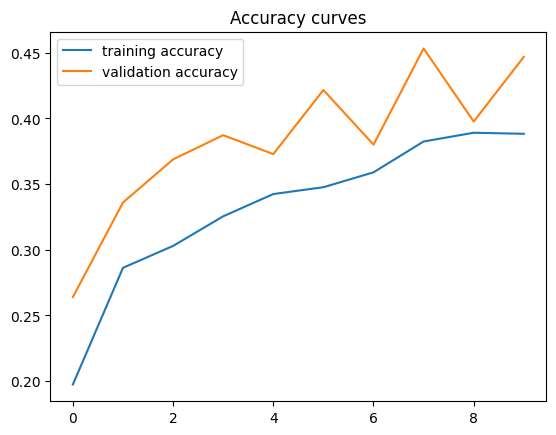

In [24]:
plot_loss_curves(history_4)

In [25]:
model_4.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 1.6336 - accuracy: 0.4468


[1.6335818767547607, 0.44679999351501465]

In [26]:
#increasing the number of layers of the model
tf.random.set_seed(42)

#creating the model
model_5 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fitting the model on augmented data
model_5.fit(train_data_augmented, epochs=5, validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 110s 453ms/step - loss: 2.2160 - accuracy: 0.1673 - val_loss: 2.1387 - val_accuracy: 0.2036
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1462 - accuracy: 0.2080 - val_loss: 2.0392 - val_accuracy: 0.2512
Epoch 3/5
235/235 [==============================] - 107s 455ms/step - loss: 2.0903 - accuracy: 0.2511 - val_loss: 1.9955 - val_accuracy: 0.2748
Epoch 4/5
235/235 [==============================] - 108s 459ms/step - loss: 2.0559 - accuracy: 0.2688 - val_loss: 1.9154 - val_accuracy: 0.3256
Epoch 5/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0117 - accuracy: 0.2809 - val_loss: 1.9476 - val_accuracy: 0.3216


In [30]:
#increasing the number of filters in each layer and fitting it for 10 epochs

tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(64,3, input_shape=(224,224,3), activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

#compiling the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 =model_6.fit(train_data_augmented, epochs=40 , validation_data=test_data)

Epoch 1/40
235/235 [==============================] - 118s 492ms/step - loss: 2.1794 - accuracy: 0.2132 - val_loss: 2.0738 - val_accuracy: 0.2432
Epoch 2/40
235/235 [==============================] - 115s 490ms/step - loss: 2.0581 - accuracy: 0.2687 - val_loss: 1.9986 - val_accuracy: 0.2916
Epoch 3/40
235/235 [==============================] - 116s 494ms/step - loss: 2.0150 - accuracy: 0.2916 - val_loss: 1.8388 - val_accuracy: 0.3572
Epoch 4/40
235/235 [==============================] - 116s 492ms/step - loss: 1.9827 - accuracy: 0.3117 - val_loss: 1.8615 - val_accuracy: 0.3464
Epoch 5/40
235/235 [==============================] - 116s 492ms/step - loss: 1.9343 - accuracy: 0.3311 - val_loss: 1.8013 - val_accuracy: 0.3712
Epoch 6/40
235/235 [==============================] - 116s 491ms/step - loss: 1.8925 - accuracy: 0.3465 - val_loss: 1.7587 - val_accuracy: 0.4032
Epoch 7/40
235/235 [==============================] - 119s 507ms/step - loss: 1.8630 - accuracy: 0.3601 - val_loss: 1.7484 -

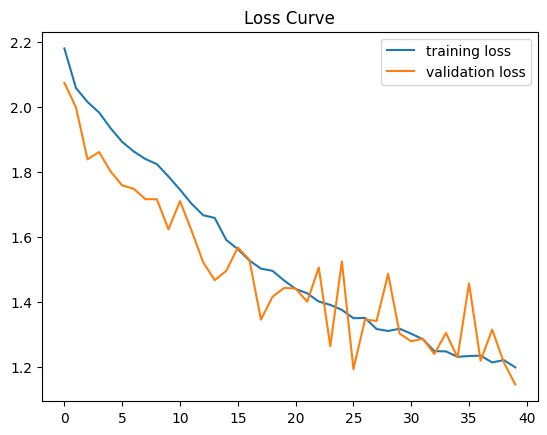

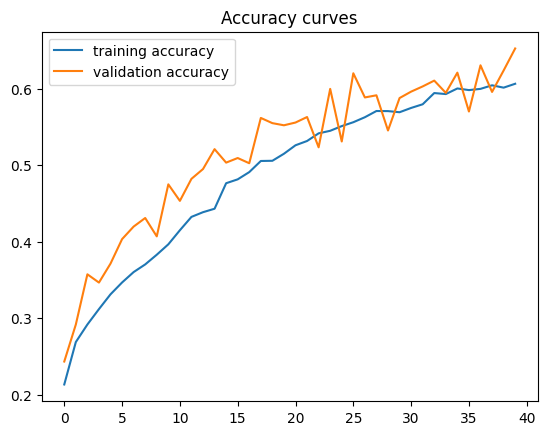

In [31]:
plot_loss_curves(history_6)

### Making predictions with our trained data

Let's use our mode`l to make some predictios on our custom images.

In [29]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [34]:
# download some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2024-04-05 03:51:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-04-05 03:51:14 (53.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]

--2024-04-05 03:51:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respons

In [41]:
# create a function to prepare and load the image
def load_and_prep_image(filename, imgsize=224):
  """
  Takes filename as input and reshape the image, normalize
  the pixels and return the image tensor
  """
  image = tf.io.read_file(filename)
  image = tf.image.decode_image(image)
  img = tf.image.resize(image, [imgsize,imgsize])

  img = img/255.
  return img

def pred_and_plot_image(model, filename, class_names=class_names):
  """
  Takes mode and filename as input and plot the predictions"""
  img = load_and_prep_image(filename)
  #make prediction on model
  pred = model.predict(tf.expand_dims(img, axis=0))

  #finding the class_name
  pred_label = class_names[pred.argmax(axis=1)]

  plt.imshow(img)
  plt.title(f"Pred Label: {pred_label[0]}")
  plt.xlabel(f"Actual label :{filename}")
  plt.xticks([])
  plt.yticks([])
  plt.show()



1/1 [==============================] - 0s 91ms/step


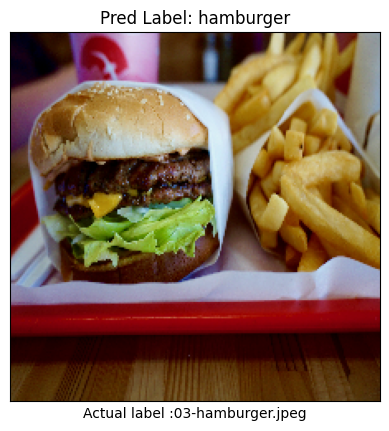

In [42]:
pred_and_plot_image(model_6, "03-hamburger.jpeg")

1/1 [==============================] - 0s 19ms/step


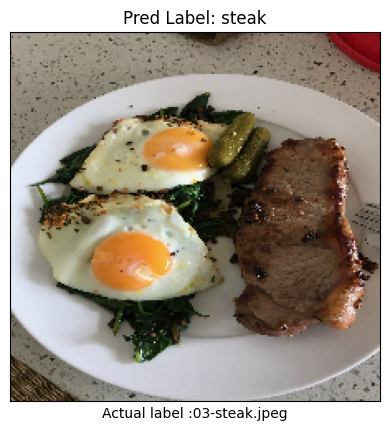

In [44]:
pred_and_plot_image(model_6, "03-steak.jpeg")

1/1 [==============================] - 0s 19ms/step


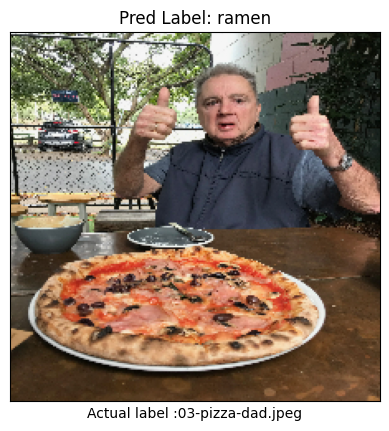

In [45]:
pred_and_plot_image(model_6, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 54ms/step


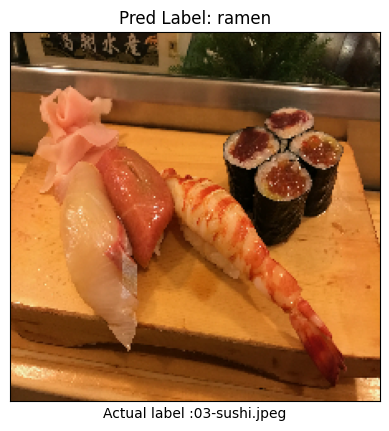

In [46]:
pred_and_plot_image(model_6, "03-sushi.jpeg")

Look like our model didn't perform very well on our custom images. This is because our model has about ~60% validation accuracy.

## Saving and loading our model

In [47]:
# Save a model
model_6.save("saved_trained_model_6")

In [48]:
#Load the trained model and evaluate it
loaded_model_6 = tf.keras.models.load_model("saved_trained_model_6")

In [49]:
loaded_model_6.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 1.1474 - accuracy: 0.6524


[1.147356390953064, 0.652400016784668]

In [50]:
# compare our loaded model to our existing model
model_6.evaluate(test_data)

79/79 [==============================] - 10s 120ms/step - loss: 1.1474 - accuracy: 0.6524


[1.1473562717437744, 0.652400016784668]

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# copy the saved_trained_model_6 to googledrive/colab notebooks/ Food Vision Custom V1 folder in the google drive

!cp -r saved_trained_model_6 '/content/drive/MyDrive/Colab Notebooks/Food Vision Custom V1'
